<a href="https://colab.research.google.com/github/Akif-Mufti/Deep-learning-2.0/blob/master/Linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [0]:
learning_rate =0.01
epochs =300

In [0]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.rand(sample_points)

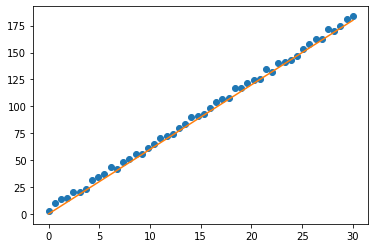

In [4]:
#ploting noisy dataset

plt.plot(x_train,y_train,'o')
#noise free dat
plt.plot(x_train,6*x_train)

plt.show()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epochs 0.000000 cost 0.513352 Weight 5.858243 Bias 0.818727
Epochs 40.000000 cost 0.000350 Weight 6.080777 Bias 1.120521
Epochs 80.000000 cost 0.000515 Weight 6.070808 Bias 1.379707
Epochs 120.000000 cost 0.000692 Weight 6.061783 Bias 1.614404
Epochs 160.000000 cost 0.000874 Weight 6.053608 Bias 1.826934
Epochs 200.000000 cost 0.001058 Weight 6.046207 Bias 2.019383
Epochs 240.000000 cost 0.001240 Weight 6.039505 Bias 2.193646
Epochs 280.000000 cost 0.001416 Weight 6.033436 Bias 2.351450


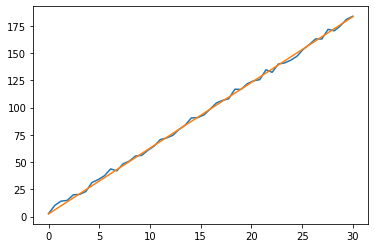

In [5]:
#declaring the placholders and variables
Y = tf.placeholder(tf.float32)
X= tf.placeholder(tf.float32)

W = tf.Variable(np.random.rand(), name = 'Weights')
B = tf.Variable(np.random.rand(), name = 'Biases')

#creating the model for regression
with tf.name_scope("model") as scope:
  prediction = W*X +B

#summaries to study the behavior of weights and biases with epochs

weight_histogram = tf.summary.histogram("Weights",W)
Bias_histogram = tf.summary.histogram("Biases",B)

#cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost",cost_iteration)

#optimizer 
with tf.name_scope("Optimizer") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_iteration)

#initializing the variables
init = tf.global_variables_initializer()

#merge all summaries 

merge_summary = tf.summary.merge_all()

#tensor flow sessions

with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log',sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})

      #write logs for each epochs
      summary_epochs = sess.run(merge_summary, feed_dict = {X:x, Y:y})
      writer.add_summary(summary_epochs,epoch)

    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x,Y:y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))

  Weight = sess.run(W)
  Bias = sess.run(B)
  plt.plot(x_train,y_train)
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()

